In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('/content/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df2=df.drop(['area_type','availability','society'],axis=1)

In [7]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df2.shape

(13320, 6)

In [10]:
df2.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [11]:
max_balcony=df2['balcony'].quantile(0.75)
df2['balcony']=df2['balcony'].fillna(max_balcony)
max_balcony

2.0

In [12]:
max_bath=df2['balcony'].quantile(0.95)
df2['bath']=df2['bath'].fillna(max_bath)
max_bath

3.0

In [13]:
#size and location null values are very less in number so we can drop them
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [14]:
df2=df2.dropna()

In [15]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [16]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
#size mainly indicates the bedroom,hall and kitchen number essentially 2 bedroom and 2 bhk is same
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [18]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [19]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [20]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


These are errors as you cannot have 2400 sqft home with 43 bedrooms

In [21]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Some prices indicate range

In [22]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [23]:
df2[df2['total_sqft'].apply(is_float)].head()#return values that are float

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [24]:
df2[~ df2['total_sqft'].apply(is_float)].head(20)#return values that are not float 

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,3.0,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,3.0,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,3.0,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [25]:
# we will convert the ranges into average values and ignore other values but unit conversion from sq meter to perch and so on can also be done

In [26]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  else:
    try:
      return float(x)
    except:
      return None
    

In [27]:
convert_sqft_to_num('23')

23.0

In [28]:
convert_sqft_to_num('23-25')

24.0

In [29]:
convert_sqft_to_num('23sq. meter')

In [30]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(10)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,2.0,370.00,6


In [31]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [32]:
df3.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
balcony           0.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [33]:
#price_per_sqft is an imortant criteria in real estate

In [34]:
df4=df3.copy()
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']#price is in lac rupees
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [35]:
#let's explore location which is a categorical data

In [36]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [37]:
df4['location'].value_counts()

Whitefield           539
Sarjapur  Road       397
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [38]:
#can't handle this using one hot encoding as length is very large

In [39]:
df4['location']=df4['location'].apply(lambda x: x.strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [40]:
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [41]:
len(location_stats[location_stats<=10])#how many locations have less than 10 data

1052

In [42]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [43]:
len(df4.location.unique())

1293

In [44]:
df4['location']=df4['location'].apply( lambda x: 'other' if x in location_stats_less_than_10 else x)

In [45]:
len(df4.location.unique())

242

In [46]:
df4.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [47]:
# A typical bedroom is usually 300 sqft
df4[df4['total_sqft']/df4['bhk']<300]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,2.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [48]:
df5=df4[~ (df4['total_sqft']/df4['bhk']<300)]
df5.shape

(12559, 8)

In [49]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [50]:
df5['price_per_sqft'].quantile(0.95)

13333.333333333334

In [51]:
#we are going to apply mean and one std dev assuming data follows a normal distribution

In [52]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key, subdf in df.groupby('location'): #key is location name and we get a df under particular location
    m=np.mean(subdf.price_per_sqft)
    std=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft< (m+std))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df6=remove_pps_outliers(df5)
df6.shape

(10286, 8)

In [53]:
df.groupby('location')['bath'].sum()

location
 Anekal                  1.0
 Banaswadi               1.0
 Basavangudi             1.0
 Bhoganhalli             1.0
 Devarabeesana Halli    16.0
                        ... 
t.c palya                6.0
tc.palya                 8.0
vinayakanagar            5.0
white field,kadugodi     6.0
whitefiled               2.0
Name: bath, Length: 1305, dtype: float64

In [54]:
len(df6.location.unique())

242

In [55]:
#let's chek some outliers where prices of 2 bedroom are higher than 3 in same location

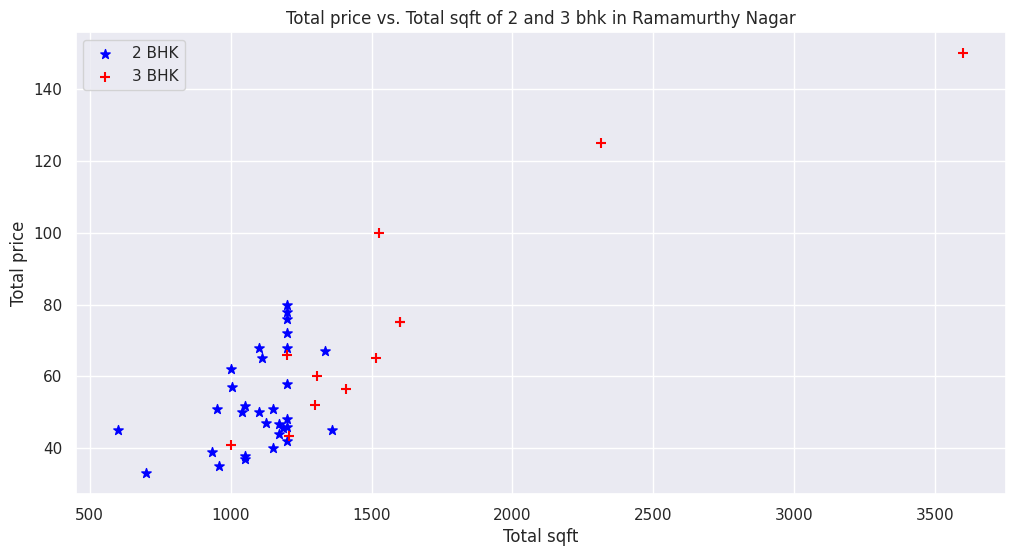

In [56]:
def bhk_scatter_plot(df,location):
     bhk2=df[(df.location==location) & (df.bhk==2)]
     bhk3=df[(df.location==location) & (df.bhk==3)]
     plt.figure(figsize=(12,6))
     plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker="*",label="2 BHK",s=50)
     plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker="+",label="3 BHK",s=50)
     plt.title(f"Total price vs. Total sqft of 2 and 3 bhk in {location}")
     plt.xlabel('Total sqft')
     plt.ylabel('Total price')
     plt.legend()
     
scatter_plt=bhk_scatter_plot(df6,'Ramamurthy Nagar')


In [57]:
'''For removing properties in same location with 2 bhk rpice higher than 3 bhk I will create a dict of stats per bhk
for a given location
{
  '1': {
    'mean': 3000,
    'std': 2.3,
    'count': 2000
  },
  '2':{
    'mean':40000,
    'std':1.8,
    'count':2190
  }
}
like from this dict we can remove those 2 bhk apartments whose price_per_sqft is less than mean of 1 bhk'''


"For removing properties in same location with 2 bhk rpice higher than 3 bhk I will create a dict of stats per bhk\nfor a given location\n{\n  '1': {\n    'mean': 3000,\n    'std': 2.3,\n    'count': 2000\n  },\n  '2':{\n    'mean':40000,\n    'std':1.8,\n    'count':2190\n  }\n}\nlike from this dict we can remove those 2 bhk apartments whose price_per_sqft is less than mean of 1 bhk"

In [58]:
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats=dict()
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices, bhk_df[(bhk_df.price_per_sqft< stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index') 
df7=remove_bhk_outliers(df6)
df7.shape

(7353, 8)

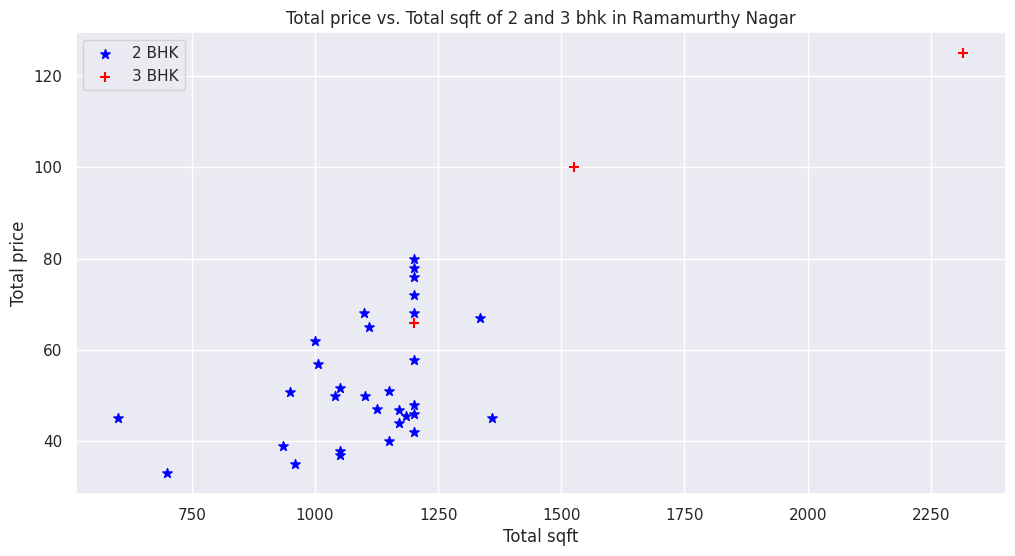

In [59]:
def bhk_scatter_plot(df,location):
     bhk2=df[(df.location==location) & (df.bhk==2)]
     bhk3=df[(df.location==location) & (df.bhk==3)]
     plt.figure(figsize=(12,6))
     plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker="*",label="2 BHK",s=50)
     plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker="+",label="3 BHK",s=50)
     plt.title(f"Total price vs. Total sqft of 2 and 3 bhk in {location}")
     plt.xlabel('Total sqft')
     plt.ylabel('Total price')
     plt.legend()
     
scatter_plt=bhk_scatter_plot(df7,'Ramamurthy Nagar')


<Axes: xlabel='price_per_sqft', ylabel='Count'>

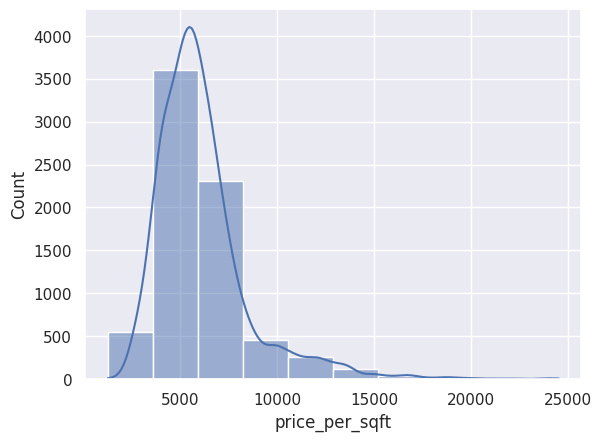

In [60]:
sns.histplot(x='price_per_sqft',data=df7,bins=10,kde=True)

In [61]:
df7.bath.unique(
    
)

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [62]:
df7[df7.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
8530,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8619,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
9352,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
9683,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [63]:
#no of bathrooms are not usually more than number of bedroom hall kitchen

<Axes: xlabel='bath', ylabel='Count'>

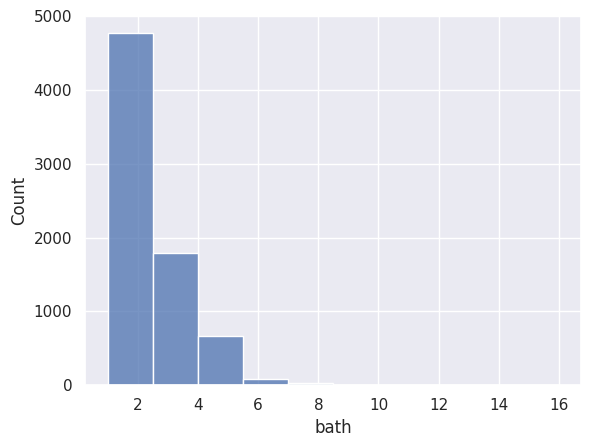

In [64]:
sns.histplot(x='bath',data=df7,bins=10)

In [65]:
df7[df7.bath>df7.bhk]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,1.0,210.0,3,10169.491525
16,1st Phase JP Nagar,1 BHK,840.0,2.0,2.0,50.0,1,5952.380952
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,3.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,3.0,450.0,6,18750.000000
48,5th Phase JP Nagar,2 BHK,1150.0,3.0,3.0,52.5,2,4565.217391
...,...,...,...,...,...,...,...,...
10189,other,4 Bedroom,3100.0,5.0,0.0,425.0,4,13709.677419
10219,other,2 BHK,600.0,3.0,2.0,72.0,2,12000.000000
10247,other,4 BHK,6652.0,6.0,1.0,660.0,4,9921.828022
10254,other,4 Bedroom,6688.0,6.0,1.0,700.0,4,10466.507177


In [66]:
df8=df7[ (df7.bath<df7.bhk+2)] # no of bathrooms can be considered to be less than bhk+2
df8.shape


(7268, 8)

In [67]:
''' now for feeding into model we can drop size column as it is included in bhk
 and price_per_sqft since it has been used to detect outliers'''

' now for feeding into model we can drop size column as it is included in bhk\n and price_per_sqft since it has been used to detect outliers'

In [68]:
df8=df8.drop(['size','price_per_sqft'],axis=1)

In [69]:
df8.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [70]:
pd.get_dummies(df8.location)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
dummies=pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df9=pd.concat([df8,dummies.drop('other',axis=1)],axis=1)
df9.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df9.drop('location',axis=1,inplace=True)

In [74]:
df9.shape

(7268, 246)

In [75]:
X=df9.drop('price',axis=1)
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y=df9.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=40)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [79]:
lr=LinearRegression()
svr=SVR()
dtree=DecisionTreeRegressor()
rf=RandomForestRegressor(n_estimators=120,random_state=0)

In [80]:
lr.fit(xtrain,ytrain)
svr.fit(xtrain,ytrain)
dtree.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=120, random_state=0)

In [81]:
lr_predict=lr.predict(xtest)
svr_predict=svr.predict(xtest)
dtree_predict=dtree.predict(xtest)
rf_predict=rf.predict(xtest)

In [82]:
from sklearn.metrics import mean_squared_error as mse

In [84]:
print("Error of Linear Regression ", mse(ytest,lr_predict))
print("Error of SVR ", mse(svr_predict,ytest))
print("Error of Decision Tree ", mse(dtree_predict,ytest))
print("Error of Random Forest ", mse(rf_predict,ytest))

Error of Linear Regression  1112.349081620938
Error of SVR  2418.0991232199553
Error of Decision Tree  1721.5982154325263
Error of Random Forest  1252.4303136419733


In [85]:
lr.score(xtest,ytest)

0.8300236932432827

In [86]:
rf.score(xtest,ytest)

0.8086181013672422

In [88]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.84433333, 0.85664359, 0.86928835, 0.88727376, 0.86982226])

In [89]:
cross_val_score(RandomForestRegressor(),X,y,cv=cv)

array([0.79442833, 0.69064903, 0.77518027, 0.86820817, 0.81008706])

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso=Lasso()
dtree1=DecisionTreeRegressor()

In [95]:
def hyperparameter_tuning(x,y):
  algos={
      'lr':{
          'model':LinearRegression(),
          'params':{
              'positive':[True,False]
          }
      },
        'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic']
          },
            },
        'dtree3':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['mse','friedman_mse'],
              'splitter':['best','random']
          },
      }
  
  }

  scores=[]
  cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algo_name,config in algos.items():
    gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(x,y)
    scores.append(
        {
            'model':algo_name,
              'best_score':gs.best_score_, #score indicates the r2 score 
         'best_params':gs.best_params_
        }
    )
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

hyperparameter_tuning(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,lr,0.865472,{'positive': False}
1,lasso,0.717998,"{'alpha': 1, 'selection': 'random'}"
2,dtree3,0.693816,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [96]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(X.columns==location)[0][0]

  x=np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if loc_index>=0:
    x[loc_index]=1
  return lr.predict([x])[0]

In [97]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [98]:
predict_price('1st Phase JP Nagar',1200,3,4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.93846903857445

In [99]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.81525199990122

In [100]:
predict_price('Indira Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.6552162302299

In [101]:
predict_price('Indira Nagar',1000,2,4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


185.67907234646597

In [102]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as file:
  pickle.dump(lr,file)

In [105]:
import json
columns={
    'data_columns':([col.lower() for col in X.columns])
}
with open('columns.json',"w") as f:
  f.write(json.dumps(columns))